Reordering the columns before doing classification using Random Forest for the original dataset.



In [ ]:
# Reordering the columns
import pandas as pd

# Columns to move to the end
columns_to_move = ['MOTHDEM','APOE4.0', 'APOE4.1', 'APOE4.2', 'CDR']

# Get the indices of the columns to move
indices_to_move = [df.columns.get_loc(col) for col in columns_to_move]

# Drop the columns from their current positions
df_without_columns = df.drop(columns_to_move, axis=1)

# Reinsert the columns at the end of the dataframe
df_reordered = pd.concat([df_without_columns, df[columns_to_move]], axis=1)
print(df_reordered.head())

   lh.Cerebellum.White.Matter  lh.Cerebellum.Cortex  lh.Thalamus.Proper  \
0                    0.745525              0.794748            0.491765   
1                    0.592240              0.665080            0.290817   
2                    0.458426              0.530987            0.383385   
3                    0.563800              0.587889            0.369088   
4                    0.624248              0.664183            0.276727   

   lh.Caudate  lh.Putamen  lh.Pallidum  X3rd.Ventricle  X4th.Ventricle  \
0    0.687288    0.354272     0.053029        0.393061        1.000000   
1    0.503438    0.297870     0.041430        0.545423        0.478379   
2    0.658083    0.419540     0.068931        0.320838        0.414968   
3    0.651455    0.384590     0.048233        0.368835        0.615725   
4    0.661635    0.520853     0.120530        0.544304        0.180479   

   Brain.Stem  lh.Hippocampus  ...  adas_Q9SCORE  adas_Q10SCORE  \
0    0.477280        0.619156  ...   

In [ ]:
# Creating a copy of the reordered dataset for further steps
df_actual = df_reordered.copy()

In [ ]:
# Creating a new column 'APOE' by combining the one-hot encoded columns before performing imputation process
df_actual['APOE'] = df_actual['APOE4.0'] * 0 + df_actual['APOE4.1'] * 1 + df_actual['APOE4.2'] * 2

# Droping the individual one-hot encoded columns
df_actual = df_actual.drop(['APOE4.0', 'APOE4.1', 'APOE4.2'], axis=1)

In [ ]:
df_actual.tail()

,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,...,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_Q10SCORE,adas_Q11SCORE,adas_Q12SCORE,adas_Q13SCORE,MOTHDEM,CDR,APOE
554,0.102050,0.000000,0.000000,0.379090,0.115710,0.014856,0.152403,0.095275,0.018378,0.311250,...,0.2,0.000000,1.00,1.0,1.000000,1.0,0.0,1,1.0,2
555,0.693037,0.668451,0.356448,0.566407,0.445647,0.057959,0.304343,0.132452,0.246746,0.142295,...,1.0,0.416667,1.00,1.0,1.000000,1.0,0.6,0,0.5,0
556,0.600632,0.715813,0.277625,0.483890,0.390352,0.058854,0.482336,0.362199,0.698153,0.252722,...,0.8,0.666667,1.00,1.0,1.000000,1.0,0.6,0,0.5,0
557,0.842654,0.786929,0.188005,0.571366,0.315403,0.042039,0.251464,0.139725,0.234703,0.082283,...,1.0,0.416667,0.75,0.5,0.666667,0.5,0.6,0,0.5,1
558,0.548794,0.615394,0.138131,0.454855,0.208531,0.034581,0.024287,0.199837,0.290168,0.081695,...,1.0,0.666667,1.00,1.0,1.000000,1.0,0.8,1,0.0,0


In [ ]:
# Creating a copy of the original dataset for classification and evaluation
df_org_class = df_actual.copy()

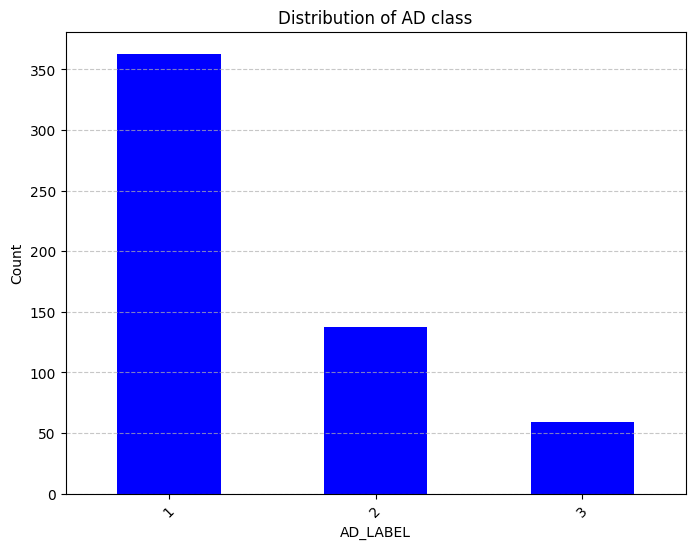

In [ ]:
# Visualizing the class distribution of AD_LABEL using a bar plot

import matplotlib.pyplot as plt
import pandas as pd

# Counting the occurrences of each class in the 'AD_LABEL' column.
class_counts = df_org_class['AD_LABEL'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='blue')
plt.title('Distribution of AD class')
plt.xlabel('AD_LABEL')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# It is observed that the 3 classes; Non-AD, MCI and AD classes are unbalanced.
# Hence balancing should be employed.
# Here we are applying SMOTE for balancing.

In [ ]:
# Importing necessary libraries for balancing the dataset, classification and validation
# SMOTE is applying here for balancing the dataset
# Random Forest Classifier for Classification
# K fold cross validation for validating the classification performance.

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Spliting the dataset into features (X) and target variable (y)
X = df_org_class.drop(columns=['AD_LABEL'])  # Features
y = df_org_class['AD_LABEL']  # Target variable

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initializing SMOTE for oversampling the minority class
smote = SMOTE(random_state=40)

# Applying SMOTE only to the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=10)

# Printing cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

# Training the classifier on the resampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


# Printing confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.93181818 0.93181818 0.90909091 0.97727273 0.96590909 0.95454545
 0.97701149 0.94252874 0.98850575 0.94252874]
Mean CV Score: 0.9521029258098224
Std CV Score: 0.023731840897204506
Accuracy: 0.8482142857142857
Precision: 0.8478918650793651
Recall: 0.8482142857142857
F1-score: 0.844468031968032

Confusion Matrix:
[[65  6  0]
 [ 7 19  4]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.92      0.91        71
           2       0.76      0.63      0.69        30
           3       0.73      1.00      0.85        11

    accuracy                           0.85       112
   macro avg       0.80      0.85      0.82       112
weighted avg       0.85      0.85      0.84       112



In [ ]:
# Accuracy of 84.82% indicates that the features in the original dataset correctly predicts the class labels for 84.82% of the instances in the test set.
# Precision: The precision for class 3 (AD) is 0.73, which means that out of all instances predicted as class 3, 73% are actually true positives.
# Recall: The recall for class 3 (AD) is 1.00, indicating that the model correctly identifies all instances of class 3 in the test set.
# F1 Score: The F1 score for class 3 (AD) is 0.85, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance in terms of both precision and recall for class 3.